# **Phân tích dữ liệu lối sống nhằm hỗ trợ ra quyết định cải thiện sức khỏe**

Trong bối cảnh đô thị hóa và áp lực học tập, công việc ngày càng gia tăng, người trẻ có xu hướng hình thành các thói quen sinh hoạt không lành mạnh như thiếu ngủ, tiêu thụ nhiều caffeine, ít vận động và mức độ căng thẳng cao. Những hành vi này có thể dẫn đến các vấn đề sức khỏe như rối loạn giấc ngủ, giảm hiệu suất làm việc và tăng nguy cơ thừa cân, béo phì.

Tuy nhiên, các ứng dụng và công cụ theo dõi sức khỏe hiện nay chủ yếu dừng lại ở việc thu thập và hiển thị dữ liệu, chưa khai thác hiệu quả các mối quan hệ tiềm ẩn giữa các yếu tố lối sống, cũng như chưa hỗ trợ người dùng trong việc ra quyết định cải thiện thói quen sinh hoạt.

Do đó, nghiên cứu này đặt ra vấn đề: **liệu có thể sử dụng các kỹ thuật khai phá dữ liệu để phân tích và khám phá mối quan hệ giữa giấc ngủ, mức tiêu thụ caffeine, hoạt động thể chất và các chỉ số sức khỏe, từ đó hỗ trợ ra quyết định nhằm cải thiện sức khỏe lối sống cho người trẻ hay không?**

In [ ]:
# Import thư viện
import pandas as pd
import numpy as np

In [ ]:
# Đọc dữ liệu
sleep_df = pd.read_csv("Sleep_Efficiency.csv")
caffeine_df = pd.read_csv("caffeine_intake_tracker.csv")
bmi_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
print("Sleep dataset:")
print(sleep_df.head(), "\n")

print("Caffeine dataset:")
print(caffeine_df.head(), "\n")

print("BMI dataset:")
print(bmi_df.head())

Sleep dataset:
   ID  Age  Gender          Bedtime     Wakeup time  Sleep duration  \
0   1   65  Female    3/6/2021 1:00   3/6/2021 7:00             6.0   
1   2   69    Male   12/5/2021 2:00  12/5/2021 9:00             7.0   
2   3   40  Female  5/25/2021 21:30  5/25/2021 5:30             8.0   
3   4   40  Female   11/3/2021 2:30  11/3/2021 8:30             6.0   
4   5   57    Male   3/13/2021 1:00  3/13/2021 9:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0                   0.0   
1                      

In [ ]:
print("Sleep dataset info")
sleep_df.info()
print("\n")

print("Caffeine dataset info")
caffeine_df.info()
print("\n")

print("BMI dataset info")
bmi_df.info()

Sleep dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency     

Sleep dataset

| Cột                  | Lý do                    |
| -------------------- | ------------------------ |
| ID                   | Định danh                |
| Bedtime, Wakeup time | Không dùng phân tích giờ |
| REM / Deep / Light % | Quá chi tiết             |
| Alcohol consumption  | Không nghiên cứu         |
| Smoking status       | Không nghiên cứu         |


In [ ]:
sleep_keep_cols = [
    'Age',
    'Gender',
    'Sleep duration',
    'Sleep efficiency',
    'Awakenings',
    'Caffeine consumption',
    'Exercise frequency'
]

sleep_df = sleep_df[sleep_keep_cols]

CAFFEINE DATASET

| Cột        | Lý do                          |
| ---------- | ------------------------------ |
| beverage_* | Không cần chi tiết loại        |
| gender_*   | Đã có giới tính ở dataset khác |
| age        | Không merge theo cá nhân       |


In [ ]:
caffeine_keep_cols = [
    'caffeine_mg',
    'sleep_quality',
    'sleep_impacted',
    'focus_level',
    'time_of_day_morning',
    'time_of_day_afternoon',
    'time_of_day_evening'
]

caffeine_df = caffeine_df[caffeine_keep_cols]

BMI DATASET

| Cột            | Lý do               |
| -------------- | ------------------- |
| Person ID      | Định danh           |
| Occupation     | Không phân tích     |
| Blood Pressure | Không dùng          |
| Heart Rate     | Không dùng          |
| Sleep Disorder | Thiếu dữ liệu nhiều |

In [ ]:
bmi_keep_cols = [
    'Sleep Duration',
    'Quality of Sleep',
    'Physical Activity Level',
    'Stress Level',
    'Daily Steps',
    'BMI Category'
]

bmi_df = bmi_df[bmi_keep_cols]

In [ ]:
print("Sleep dataset columns:", sleep_df.columns.tolist())
print("Caffeine dataset columns:", caffeine_df.columns.tolist())
print("BMI dataset columns:", bmi_df.columns.tolist())

Sleep dataset columns: ['Age', 'Gender', 'Sleep duration', 'Sleep efficiency', 'Awakenings', 'Caffeine consumption', 'Exercise frequency']
Caffeine dataset columns: ['caffeine_mg', 'sleep_quality', 'sleep_impacted', 'focus_level', 'time_of_day_morning', 'time_of_day_afternoon', 'time_of_day_evening']
BMI dataset columns: ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Daily Steps', 'BMI Category']


Tiền xử lý dữ liệu

Các giá trị thiếu trong dữ liệu được xử lý bằng cách thay thế bằng trung vị (median) đối với các biến số nhằm hạn chế ảnh hưởng của ngoại lệ.

In [ ]:
print("Missing values - Sleep dataset")
print(sleep_df.isnull().sum(), "\n")

print("Missing values - Caffeine dataset")
print(caffeine_df.isnull().sum(), "\n")

print("Missing values - BMI dataset")
print(bmi_df.isnull().sum())

Missing values - Sleep dataset
Age                      0
Gender                   0
Sleep duration           0
Sleep efficiency         0
Awakenings              20
Caffeine consumption    25
Exercise frequency       6
dtype: int64 

Missing values - Caffeine dataset
caffeine_mg              0
sleep_quality            0
sleep_impacted           0
focus_level              0
time_of_day_morning      0
time_of_day_afternoon    0
time_of_day_evening      0
dtype: int64 

Missing values - BMI dataset
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Daily Steps                0
BMI Category               0
dtype: int64


In [ ]:
sleep_df['Awakenings'].fillna(sleep_df['Awakenings'].median(), inplace=True)
sleep_df['Caffeine consumption'].fillna(sleep_df['Caffeine consumption'].median(), inplace=True)
sleep_df['Exercise frequency'].fillna(sleep_df['Exercise frequency'].median(), inplace=True)

/tmp/ipython-input-4289245720.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sleep_df['Awakenings'].fillna(sleep_df['Awakenings'].median(), inplace=True)
/tmp/ipython-input-4289245720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
print(sleep_df.isnull().sum())
print(caffeine_df.isnull().sum())
print(bmi_df.isnull().sum())

Age                     0
Gender                  0
Sleep duration          0
Sleep efficiency        0
Awakenings              0
Caffeine consumption    0
Exercise frequency      0
dtype: int64
caffeine_mg              0
sleep_quality            0
sleep_impacted           0
focus_level              0
time_of_day_morning      0
time_of_day_afternoon    0
time_of_day_evening      0
dtype: int64
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Daily Steps                0
BMI Category               0
dtype: int64


Chuẩn hóa & tạo biến nhóm

In [ ]:
# TẠO NHÓM MỨC CAFFEINE
caffeine_df['caffeine_level'] = pd.cut(
    caffeine_df['caffeine_mg'],
    bins=[0, 0.33, 0.66, 1.0],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

In [ ]:
# TẠO NHÓM CHẤT LƯỢNG GIẤC NGỦ
caffeine_df['sleep_quality_group'] = pd.cut(
    caffeine_df['sleep_quality'],
    bins=[0, 0.33, 0.66, 1.0],
    labels=['Poor', 'Average', 'Good'],
    include_lowest=True
)

In [ ]:
pd.crosstab(
    caffeine_df['caffeine_level'],
    caffeine_df['sleep_quality_group'],
    normalize='index'
)

sleep_quality_group,Poor,Average,Good
caffeine_level,,,
Low,0.093633,0.273408,0.632959
Medium,0.225275,0.456044,0.318681
High,0.254902,0.509804,0.235294


In [ ]:
# TẠO NHÓM THỜI LƯỢNG NGỦ
sleep_df['sleep_duration_group'] = pd.cut(
    sleep_df['Sleep duration'],
    bins=[0, 6, 8, 24],
    labels=['Short', 'Normal', 'Long']
)

In [ ]:
# TẠO NHÓM MỨC VẬN ĐỘNG
sleep_df['exercise_level'] = pd.cut(
    sleep_df['Exercise frequency'],
    bins=[0, 2, 4, 7],
    labels=['Low', 'Medium', 'High']
)

In [ ]:
print(caffeine_df[['caffeine_mg', 'caffeine_level']].head())
print(caffeine_df[['sleep_quality', 'sleep_quality_group']].head())
print(sleep_df[['Sleep duration', 'sleep_duration_group']].head())
print(sleep_df[['Exercise frequency', 'exercise_level']].head())

   caffeine_mg caffeine_level
0     0.454545         Medium
1     0.286364            Low
2     0.531818         Medium
3     0.068182            Low
4     0.409091         Medium
   sleep_quality sleep_quality_group
0       0.749790                Good
1       0.730060                Good
2       0.276600                Poor
3       0.654003             Average
4       0.709735                Good
   Sleep duration sleep_duration_group
0             6.0                Short
1             7.0               Normal
2             8.0               Normal
3             6.0                Short
4             8.0               Normal
   Exercise frequency exercise_level
0                 3.0         Medium
1                 3.0         Medium
2                 3.0         Medium
3                 1.0            Low
4                 3.0         Medium


Merge 2 dataset (Sleep và BMI)  
Do các bộ dữ liệu được thu thập độc lập và không chia sẻ khóa định danh chung, nghiên cứu tiến hành tổng hợp dữ liệu theo nhóm hành vi (profile-level aggregation) trước khi kết hợp. Cách tiếp cận này giúp khai thác mối quan hệ tổng quát giữa giấc ngủ, vận động và chỉ số BMI mà không giả định các quan sát thuộc cùng một cá nhân.

In [ ]:
# TẠO NHÓM TUỔI
def age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle'
    else:
        return 'Senior'

sleep_df['age_group'] = sleep_df['Age'].apply(age_group)

In [ ]:
# TẠO PROFILE CHO SLEEP DATASET
sleep_profile = sleep_df.groupby(
    ['Gender', 'sleep_duration_group', 'exercise_level']
).agg({
    'Sleep efficiency': 'mean',
    'Awakenings': 'mean',
    'Caffeine consumption': 'mean'
}).reset_index()

/tmp/ipython-input-2696484224.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_profile = sleep_df.groupby(


In [ ]:
# TẠO PROFILE CHO BMI DATASET
bmi_profile = bmi_df.groupby(
    ['BMI Category']
).agg({
    'Quality of Sleep': 'mean',
    'Physical Activity Level': 'mean',
    'Stress Level': 'mean',
    'Daily Steps': 'mean'
}).reset_index()

In [ ]:
# MERGE PROFILE
merged_df = sleep_profile.merge(
    bmi_profile,
    how='cross'
)

In [ ]:
print(merged_df.head())
print("Shape:", merged_df.shape)

   Gender sleep_duration_group exercise_level  Sleep efficiency  Awakenings  \
0  Female                Short            Low          0.729091    1.636364   
1  Female                Short            Low          0.729091    1.636364   
2  Female                Short            Low          0.729091    1.636364   
3  Female                Short            Low          0.729091    1.636364   
4  Female                Short         Medium          0.900000    0.000000   

   Caffeine consumption   BMI Category  Quality of Sleep  \
0             52.272727         Normal          7.661538   
1             52.272727  Normal Weight          7.428571   
2             52.272727          Obese          6.400000   
3             52.272727     Overweight          6.898649   
4              0.000000         Normal          7.661538   

   Physical Activity Level  Stress Level  Daily Steps  
0                57.692308      5.128205  6887.179487  
1                60.333333      5.190476  6766.66666

In [ ]:
merged_df.info()
merged_df.isnull().sum()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   72 non-null     object  
 1   sleep_duration_group     72 non-null     category
 2   exercise_level           72 non-null     category
 3   Sleep efficiency         48 non-null     float64 
 4   Awakenings               48 non-null     float64 
 5   Caffeine consumption     48 non-null     float64 
 6   BMI Category             72 non-null     object  
 7   Quality of Sleep         72 non-null     float64 
 8   Physical Activity Level  72 non-null     float64 
 9   Stress Level             72 non-null     float64 
 10  Daily Steps              72 non-null     float64 
dtypes: category(2), float64(7), object(2)
memory usage: 5.6+ KB


,Sleep efficiency,Awakenings,Caffeine consumption,Quality of Sleep,Physical Activity Level,Stress Level,Daily Steps
count,48.000000,48.000000,48.000000,72.000000,72.000000,72.000000,72.000000
mean,0.809091,1.321940,23.339421,7.097190,58.565532,5.437103,5992.346674
std,0.044136,0.624558,15.584582,0.491739,2.453006,0.280788,1537.920630
min,0.729091,0.000000,0.000000,6.400000,55.000000,5.128205,3350.000000
25%,0.784706,1.000000,14.375000,6.773986,57.019231,5.174908,5912.500000
50%,0.800729,1.589458,18.604932,7.163610,59.012821,5.445238,6826.923077
75%,0.831903,1.767045,34.972426,7.486813,60.559122,5.707432,6906.769751
max,0.900000,2.000000,52.272727,7.661538,61.236486,5.729730,6965.540541


In [ ]:
merged_df.columns = (
    merged_df.columns
    .str.lower()
    .str.replace(' ', '_')
)

In [ ]:
low = merged_df['caffeine_consumption'].quantile(0.33)
high = merged_df['caffeine_consumption'].quantile(0.66)

merged_df['caffeine_level'] = pd.cut(
    merged_df['caffeine_consumption'],
    bins=[0, low, high, merged_df['caffeine_consumption'].max()],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

Giá trị thiếu được xử lý bằng median nhằm giảm ảnh hưởng của ngoại lệ.

In [ ]:
numeric_cols = [
    'sleep_efficiency',
    'awakenings',
    'caffeine_consumption',
    'physical_activity_level',
    'stress_level',
    'daily_steps'
]


for col in numeric_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

In [ ]:
merged_df.head()

,gender,sleep_duration_group,exercise_level,sleep_efficiency,awakenings,caffeine_consumption,bmi_category,quality_of_sleep,physical_activity_level,stress_level,daily_steps,caffeine_level
0,Female,Short,Low,0.729091,1.636364,52.272727,Normal,7.661538,57.692308,5.128205,6887.179487,High
1,Female,Short,Low,0.729091,1.636364,52.272727,Normal Weight,7.428571,60.333333,5.190476,6766.666667,High
2,Female,Short,Low,0.729091,1.636364,52.272727,Obese,6.400000,55.000000,5.700000,3350.000000,High
3,Female,Short,Low,0.729091,1.636364,52.272727,Overweight,6.898649,61.236486,5.729730,6965.540541,High
4,Female,Short,Medium,0.900000,0.000000,0.000000,Normal,7.661538,57.692308,5.128205,6887.179487,Low


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   72 non-null     object  
 1   sleep_duration_group     72 non-null     category
 2   exercise_level           72 non-null     category
 3   sleep_efficiency         72 non-null     float64 
 4   awakenings               72 non-null     float64 
 5   caffeine_consumption     72 non-null     float64 
 6   bmi_category             72 non-null     object  
 7   quality_of_sleep         72 non-null     float64 
 8   physical_activity_level  72 non-null     float64 
 9   stress_level             72 non-null     float64 
 10  daily_steps              72 non-null     float64 
 11  caffeine_level           48 non-null     category
dtypes: category(3), float64(7), object(2)
memory usage: 5.8+ KB


In [ ]:
merged_df['caffeine_level'].value_counts()

,count
caffeine_level,
Low,16
Medium,16
High,16


Các biến được lựa chọn cho phân cụm bao gồm hiệu quả giấc ngủ, số lần thức giấc, mức tiêu thụ caffeine, mức độ vận động, mức độ căng thẳng và số bước đi hàng ngày. Các biến này phản ánh trực tiếp hành vi sinh hoạt và trạng thái sức khỏe của người tham gia, đồng thời không chứa thông tin nhãn, phù hợp cho bài toán phân cụm không giám sát.

In [ ]:
X = merged_df[numeric_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


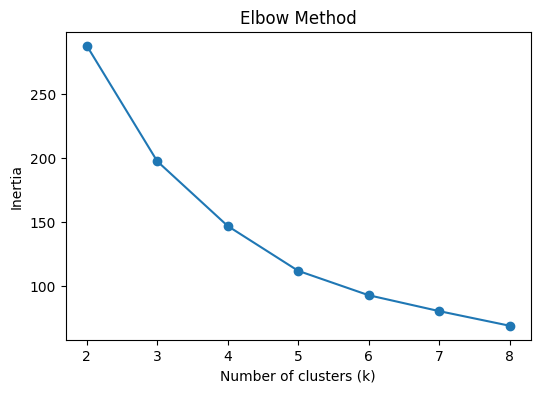

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []

K_range = range(2, 9)
for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k = {k}, silhouette = {score:.3f}")


k = 2, silhouette = 0.410
k = 3, silhouette = 0.438
k = 4, silhouette = 0.442
k = 5, silhouette = 0.471
k = 6, silhouette = 0.472
k = 7, silhouette = 0.484
k = 8, silhouette = 0.491


Mặc dù chỉ số Silhouette tăng khi số cụm tăng, tuy nhiên việc lựa chọn số cụm không chỉ dựa trên chỉ số đánh giá mà còn cần đảm bảo khả năng diễn giải và ứng dụng thực tế. Với kích thước mẫu 72 quan sát, việc chia thành quá nhiều cụm sẽ dẫn đến các cụm nhỏ và khó phân tích. Do đó, nghiên cứu lựa chọn số cụm k = 3 nhằm cân bằng giữa chất lượng phân cụm và khả năng diễn giải.

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
merged_df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
merged_df.groupby('cluster')[numeric_cols].mean()


,sleep_efficiency,awakenings,caffeine_consumption,physical_activity_level,stress_level,daily_steps
cluster,,,,,,
0,0.797638,1.571877,23.700166,55.000000,5.700000,3350.000000
1,0.793134,1.610002,23.821843,59.754043,5.349470,6873.128898
2,0.872784,0.363636,10.511364,58.889671,5.413203,6232.560008


CLUSTER 0 – “Nhóm ngủ kém, ít vận động”

Đặc điểm nổi bật:

Sleep efficiency thấp

Awakenings cao

Caffeine cao

Daily steps thấp nhất

Stress cao nhất

+ Diễn giải:

Đây là nhóm có chất lượng giấc ngủ kém nhất, thể hiện qua hiệu quả ngủ thấp và số lần thức giấc nhiều. Mặc dù mức tiêu thụ caffeine tương đối cao, nhóm này lại có mức vận động thấp và stress cao, cho thấy lối sống ít vận động có thể liên quan đến giấc ngủ kém.

+ Ý nghĩa thực tế:

Nhóm cần can thiệp

Đối tượng phù hợp cho:

Giảm caffeine

Tăng vận động nhẹ

Quản lý stress  
  

CLUSTER 1 – “Nhóm năng động nhưng ngủ chưa tối ưu”

Đặc điểm nổi bật:

Physical activity & daily steps cao nhất

Nhưng awakenings vẫn cao

Caffeine vẫn cao

+ Diễn giải:

Nhóm này có mức độ vận động và số bước đi hàng ngày cao, tuy nhiên chất lượng giấc ngủ chưa thực sự tốt do số lần thức giấc nhiều và mức tiêu thụ caffeine cao. Điều này cho thấy vận động nhiều không hoàn toàn bù đắp được tác động tiêu cực của caffeine đến giấc ngủ.

+ Ý nghĩa thực tế:

Nhóm khỏe về thể chất

Nhưng cần:

Điều chỉnh thời điểm / lượng caffeine

Cải thiện vệ sinh giấc ngủ  

CLUSTER 2 – “Nhóm ngủ tốt, caffeine thấp”

Đặc điểm nổi bật:

Sleep efficiency cao nhất

Awakenings thấp nhất

Caffeine thấp nhất

Vận động khá cao

+ Diễn giải:

Đây là nhóm có chất lượng giấc ngủ tốt nhất trong dữ liệu. Nhóm này tiêu thụ ít caffeine, ít bị thức giấc ban đêm và vẫn duy trì mức vận động tương đối cao, cho thấy sự cân bằng tốt giữa lối sống và giấc ngủ.

+ Ý nghĩa thực tế:

Nhóm lý tưởng

Có thể dùng làm:

Nhóm tham chiếu (benchmark)

Mô hình hành vi ngủ lành mạnh

In [ ]:
pd.crosstab(
    merged_df['cluster'],
    merged_df['caffeine_level'],
    normalize='index'
)

caffeine_level,Low,Medium,High
cluster,,,
0,0.200000,0.400000,0.400000
1,0.222222,0.333333,0.444444
2,0.727273,0.272727,0.000000


Cluster 0 – Nhóm tiêu thụ caffeine trung bình–cao

80% uống Medium–High caffeine

Gần như không có nhóm Low

→ Nhóm uống cà phê thường xuyên

Cluster 1 – Nhóm caffeine cao

44.4% High caffeine (cao nhất)

Low rất ít

→ Nhóm nguy cơ ảnh hưởng giấc ngủ

Cluster 2 – Nhóm caffeine thấp

72.7% Low caffeine

0% High caffeine

→ Nhóm có thói quen sinh hoạt lành mạnh hơn

Cluster 2 chính là nhóm “ngủ tốt tiềm năng”